## Using Categorical Data

#### Import the relevant Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

#### Load the dataset

In [4]:
data = pd.read_csv("3.01. Country clusters.csv")

In [5]:
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


#### Map Data

In [6]:
data_mapped = data.copy()
data_mapped["Language"] = data_mapped["Language"].map({"English":0, "French":1, "German":2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### Select the Features

In [7]:
x = data_mapped.iloc[:,3:]
x


,Language
0,0
1,0
2,1
3,0
4,2
5,0


#### Clustering

In [8]:
Kmeans = KMeans(3)

In [9]:
Kmeans.fit(x)

KMeans(n_clusters=3)

In [10]:
indentified_clusters = Kmeans.fit_predict(x)
indentified_clusters

array([0, 0, 1, 0, 2, 0], dtype=int32)

In [11]:
data_with_clusters = data_mapped.copy()
data_with_clusters["Cluster"] = indentified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,2
5,Australia,-25.45,133.11,0,0


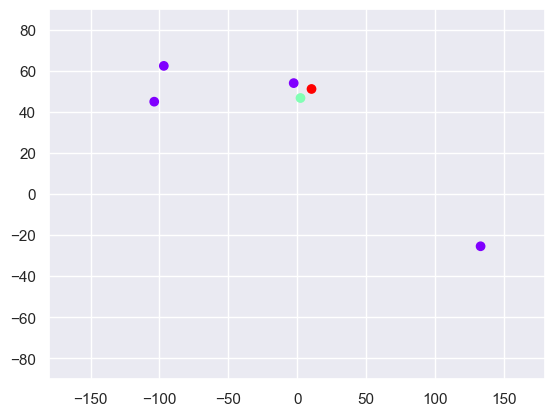

In [12]:
plt.scatter(x=data_with_clusters["Longitude"], y=data_with_clusters["Latitude"], c=data_with_clusters["Cluster"], cmap='rainbow')
plt.ylim(-90, 90)
plt.xlim(-180, 180)
plt.show()

### Using Latitude and Longitude again

In [13]:
x = data_mapped.iloc[:,1:3]
x


,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [14]:
Kmeans = KMeans(3)

In [15]:
indentified_clusters = Kmeans.fit_predict(x)
indentified_clusters

array([1, 1, 0, 0, 0, 2], dtype=int32)

In [16]:
data_with_clusters = data_mapped.copy()
data_with_clusters["Cluster"] = indentified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,2


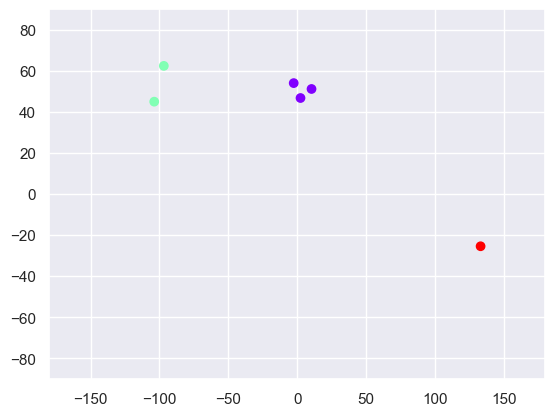

In [17]:
plt.scatter(x=data_with_clusters["Longitude"], y=data_with_clusters["Latitude"], c=data_with_clusters["Cluster"], cmap='rainbow')
plt.ylim(-90, 90)
plt.xlim(-180, 180)
plt.show()